# Load and transform data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [2]:
# load
A_hhold_train = pd.read_csv('A_hhold_train.csv')
A_indiv_train = pd.read_csv('A_indiv_train.csv')
A_hhold_test = pd.read_csv('A_hhold_test.csv')
A_indiv_test = pd.read_csv('A_indiv_test.csv')
# remove cols
A_indiv_train_1 = A_indiv_train.drop(['iid','poor','country'], axis=1)
A_indiv_test_1 = A_indiv_test.drop(['iid','country'], axis=1)
# indiv numerical cols
A_indiv_train_num_col = list(A_indiv_train_1.dtypes[A_indiv_train_1.dtypes!='object'].index)
A_indiv_train_num_col.remove('id')
# keep categorial cols only
A_indiv_train_cat = A_indiv_train_1.drop(A_indiv_train_num_col, axis=1)
A_indiv_test_cat = A_indiv_test_1.drop(A_indiv_train_num_col, axis=1)
# keep numerical cols only
A_indiv_train_num_col.append('id')
A_indiv_train_num = A_indiv_train_1[A_indiv_train_num_col]
A_indiv_test_num = A_indiv_test_1[A_indiv_train_num_col]
# pivot to get freq for cat cols
A_indiv_train_cat_frq = (A_indiv_train_cat.set_index('id').stack()
 .groupby(level=[0,1])
 .value_counts()
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))
A_indiv_test_cat_frq = (A_indiv_test_cat.set_index('id').stack()
 .groupby(level=[0,1])
 .value_counts()
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))
# mean for num cols
A_indiv_train_num_mean = A_indiv_train_num.groupby('id').mean()
A_indiv_test_num_mean = A_indiv_test_num.groupby('id').mean()
# join to hhold 
A_train = A_hhold_train.set_index('id').join(A_indiv_train_cat_frq).join(A_indiv_train_num_mean)
A_test = A_hhold_test.set_index('id').join(A_indiv_test_cat_frq).join(A_indiv_test_num_mean)
# add missing freq cols
for i in [i for i in A_indiv_test_cat_frq.columns if i not in A_indiv_train_cat_frq.columns]:
    A_train[i] = 0
for i in [i for i in A_indiv_train_cat_frq.columns if i not in A_indiv_test_cat_frq.columns]:
    A_test[i] = 0   
# convert to numeric arrays
A = pd.concat([A_train,A_test], axis=0)
A.columns = [''.join(col).strip() for col in A.columns.values]
A_feature = A.drop(['poor','country'], axis=1)
# standardization
A_cols_to_std = list(A_feature.dtypes[A_feature.dtypes!='object'].index)
A_feature[A_cols_to_std] = A_feature[A_cols_to_std].apply(lambda x: (x-x.mean()) / x.std())
# Encoding categorical cols
AX_all = pd.get_dummies(A_feature,drop_first=True)
# Split back into train and test
AX_test = AX_all[AX_all.index.isin(A_test.index)].as_matrix()
AX = AX_all[AX_all.index.isin(A_train.index)].as_matrix()
# Get train target 
Ay = np.array(A.poor[A.poor.isnull()==False].astype(int))
# split data
AXtrn,AXtst,Aytrn,Aytst = train_test_split(AX,Ay,test_size=0.33, random_state=42)

C:\Users\lyi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [3]:
print(A_hhold_train.shape,A_indiv_train.shape,A_indiv_train_cat.shape,A_indiv_train_cat_frq.shape
      ,A_indiv_train_num.shape,A_indiv_train_num_mean.shape,A_train.shape)
print(A_hhold_test.shape,A_indiv_test.shape,A_indiv_test_cat.shape,A_indiv_test_cat_frq.shape
      ,A_indiv_test_num.shape,A_indiv_test_num_mean.shape,A_test.shape)
print(AX_all.shape,AX.shape,AX_test.shape)

(8203, 346) (37560, 44) (37560, 39) (8203, 271) (37560, 3) (8203, 2) (8203, 621)
(4041, 345) (18535, 43) (18535, 39) (4041, 270) (18535, 3) (4041, 2) (4041, 620)
(12244, 795) (8203, 795) (4041, 795)


In [4]:
#load
B_hhold_train = pd.read_csv('B_hhold_train.csv')
B_indiv_train = pd.read_csv('B_indiv_train.csv')
B_hhold_test = pd.read_csv('B_hhold_test.csv')
B_indiv_test = pd.read_csv('B_indiv_test.csv')
# remove cols
B_indiv_train_1 = B_indiv_train.drop(['iid','poor','country'], axis=1)
B_indiv_test_1 = B_indiv_test.drop(['iid','country'], axis=1)
# indiv numerical cols
B_indiv_train_num_col = list(B_indiv_train_1.dtypes[B_indiv_train_1.dtypes!='object'].index)
B_indiv_train_num_col.remove('id')
# keep categorial cols only
B_indiv_train_cat = B_indiv_train_1.drop(B_indiv_train_num_col, axis=1)
B_indiv_test_cat = B_indiv_test_1.drop(B_indiv_train_num_col, axis=1)
# keep numerical cols only
B_indiv_train_num_col.append('id')
B_indiv_train_num = B_indiv_train_1[B_indiv_train_num_col]
B_indiv_test_num = B_indiv_test_1[B_indiv_train_num_col]
# pivot to get freq for cat cols
B_indiv_train_cat_frq = (B_indiv_train_cat.set_index('id').stack()
 .groupby(level=[0,1])
 .value_counts()
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))
B_indiv_test_cat_frq = (B_indiv_test_cat.set_index('id').stack()
 .groupby(level=[0,1])
 .value_counts()
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))
# mean for num cols
B_indiv_train_num_mean = B_indiv_train_num.groupby('id').mean()
B_indiv_test_num_mean = B_indiv_test_num.groupby('id').mean()
# join to hhold 
B_train = B_hhold_train.set_index('id').join(B_indiv_train_cat_frq).join(B_indiv_train_num_mean,lsuffix='ind_')
B_test = B_hhold_test.set_index('id').join(B_indiv_test_cat_frq).join(B_indiv_test_num_mean,lsuffix='ind_')
# add missing freq cols
for i in [i for i in B_indiv_test_cat_frq.columns if i not in B_indiv_train_cat_frq.columns]:
    B_train[i] = 0
for i in [i for i in B_indiv_train_cat_frq.columns if i not in B_indiv_test_cat_frq.columns]:
    B_test[i] = 0   
# convert to numeric arrays
B = pd.concat([B_train,B_test], axis=0)
B.columns = [''.join(col).strip() for col in B.columns.values]
B_feature = B.drop(['poor','country'], axis=1)
# standardization
B_cols_to_std = list(B_feature.dtypes[B_feature.dtypes!='object'].index)
imp = Imputer(strategy="median")
B_num_feature_arr = imp.fit_transform(B_feature[B_cols_to_std].apply(lambda x: (x-x.mean()) / x.std()))
B_feature[B_cols_to_std] = B_num_feature_arr
# Encoding categorical cols
BX_all = pd.get_dummies(B_feature,drop_first=True)
# Split back into train and test
BX_test = BX_all[BX_all.index.isin(B_test.index)].as_matrix()
BX = BX_all[BX_all.index.isin(B_train.index)].as_matrix()
# Get train target 
By = np.array(B.poor[B.poor.isnull()==False].astype(int)) 
# split data
BXtrn,BXtst,Bytrn,Bytst = train_test_split(BX,By,test_size=0.33, random_state=42)

C:\Users\lyi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [5]:
print(B_hhold_train.shape,B_indiv_train.shape,B_indiv_train_cat.shape,B_indiv_train_cat_frq.shape
      ,B_indiv_train_num.shape,B_indiv_train_num_mean.shape,B_train.shape)
print(B_hhold_test.shape,B_indiv_test.shape,B_indiv_test_cat.shape,B_indiv_test_cat_frq.shape
      ,B_indiv_test_num.shape,B_indiv_test_num_mean.shape,B_test.shape)
print(BX_all.shape,BX.shape,BX_test.shape)

(3255, 443) (20252, 227) (20252, 192) (3255, 1608) (20252, 33) (3255, 32) (3255, 2141)
(1604, 442) (10066, 226) (10066, 192) (1604, 1501) (10066, 33) (1604, 32) (1604, 2140)
(4859, 2722) (3255, 2722) (1604, 2722)


In [6]:
#load 
C_hhold_train = pd.read_csv('C_hhold_train.csv')
C_indiv_train = pd.read_csv('C_indiv_train.csv')
C_hhold_test = pd.read_csv('C_hhold_test.csv')
C_indiv_test = pd.read_csv('C_indiv_test.csv')
# remove cols
C_indiv_train_1 = C_indiv_train.drop(['iid','poor','country'], axis=1)
C_indiv_test_1 = C_indiv_test.drop(['iid','country'], axis=1)
# indiv numerical cols
C_indiv_train_num_col = list(C_indiv_train_1.dtypes[C_indiv_train_1.dtypes!='object'].index)
C_indiv_train_num_col.remove('id')
# keep categorial cols only
C_indiv_train_cat = C_indiv_train_1.drop(C_indiv_train_num_col, axis=1)
C_indiv_test_cat = C_indiv_test_1.drop(C_indiv_train_num_col, axis=1)
# keep numerical cols only
C_indiv_train_num_col.append('id')
C_indiv_train_num = C_indiv_train_1[C_indiv_train_num_col]
C_indiv_test_num = C_indiv_test_1[C_indiv_train_num_col]
# pivot to get freq for cat cols
C_indiv_train_cat_frq = (C_indiv_train_cat.set_index('id').stack()
 .groupby(level=[0,1])
 .value_counts()
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))
C_indiv_test_cat_frq = (C_indiv_test_cat.set_index('id').stack()
 .groupby(level=[0,1])
 .value_counts()
 .unstack(level=[1,2])
 .fillna(0)
 .sort_index(axis=1))
# mean for num cols
C_indiv_train_num_mean = C_indiv_train_num.groupby('id').mean()
C_indiv_test_num_mean = C_indiv_test_num.groupby('id').mean()
# join to hhold 
C_train = C_hhold_train.set_index('id').join(C_indiv_train_cat_frq).join(C_indiv_train_num_mean)
C_test = C_hhold_test.set_index('id').join(C_indiv_test_cat_frq).join(C_indiv_test_num_mean)
# add missing freq cols
for i in [i for i in C_indiv_test_cat_frq.columns if i not in C_indiv_train_cat_frq.columns]:
    C_train[i] = 0
for i in [i for i in C_indiv_train_cat_frq.columns if i not in C_indiv_test_cat_frq.columns]:
    C_test[i] = 0    
# convert to numeric arrays
C = pd.concat([C_train,C_test], axis=0)
C.columns = [''.join(col).strip() for col in C.columns.values]
C_feature = C.drop(['poor','country'], axis=1)
# standardization
C_cols_to_std = list(C_feature.dtypes[C_feature.dtypes!='object'].index)
C_feature[C_cols_to_std] = C_feature[C_cols_to_std].apply(lambda x: (x-x.mean()) / x.std())
# Encoding categorical cols
CX_all = pd.get_dummies(C_feature,drop_first=True)
# Split back into train and test
CX_test = CX_all[CX_all.index.isin(C_test.index)].as_matrix()
CX = CX_all[CX_all.index.isin(C_train.index)].as_matrix()
# Get train target 
Cy = np.array(C.poor[C.poor.isnull()==False].astype(int)) 
# split data
CXtrn,CXtst,Cytrn,Cytst = train_test_split(CX,Cy,test_size=0.33, random_state=42)    

C:\Users\lyi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [7]:
print(C_hhold_train.shape,C_indiv_train.shape,C_indiv_train_cat.shape,C_indiv_train_cat_frq.shape
      ,C_indiv_train_num.shape,C_indiv_train_num_mean.shape,C_train.shape)
print(C_hhold_test.shape,C_indiv_test.shape,C_indiv_test_cat.shape,C_indiv_test_cat_frq.shape
      ,C_indiv_test_num.shape,C_indiv_test_num_mean.shape,C_test.shape)
print(CX_all.shape,CX.shape,CX_test.shape)

(6469, 165) (29913, 44) (29913, 36) (6469, 294) (29913, 6) (6469, 5) (6469, 464)
(3187, 164) (14701, 43) (14701, 36) (3187, 295) (14701, 6) (3187, 5) (3187, 463)
(9656, 974) (6469, 974) (3187, 974)


# Top RF Features

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(AXtrn, Aytrn)
Arf_feat_impt = sorted(zip(rf.feature_importances_, AX_all.columns), reverse=True)
rf.fit(BXtrn, Bytrn)
Brf_feat_impt = sorted(zip(rf.feature_importances_, BX_all.columns), reverse=True)
rf.fit(CXtrn, Cytrn)
Crf_feat_impt = sorted(zip(rf.feature_importances_, CX_all.columns), reverse=True)

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

best = {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
bestsvc = SVC(probability=True)
bestsvc.set_params(**best)

def log_loss_top_feature(n, data):
    if data == 'A':
        top_importances = [x[1] for x in Arf_feat_impt][:n]
        Xtrn_top,Xtst_top,ytrn_top,ytst_top = train_test_split(
            AX_all[AX_all.index.isin(A_train.index)][top_importances].as_matrix(),
            Ay,test_size=0.33, random_state=42)
        bestsvc.fit(Xtrn_top,ytrn_top)
        return(log_loss(ytst_top, bestsvc.predict_proba(Xtst_top)))

    if data == 'B':
        top_importances = [x[1] for x in Brf_feat_impt][:n]
        Xtrn_top,Xtst_top,ytrn_top,ytst_top = train_test_split(
            BX_all[BX_all.index.isin(B_train.index)][top_importances].as_matrix(),
            By,test_size=0.33, random_state=42)
        bestsvc.fit(Xtrn_top,ytrn_top)
        return(log_loss(ytst_top, bestsvc.predict_proba(Xtst_top)))

    if data == 'C':
        top_importances = [x[1] for x in Crf_feat_impt][:n]
        Xtrn_top,Xtst_top,ytrn_top,ytst_top = train_test_split(
            CX_all[CX_all.index.isin(C_train.index)][top_importances].as_matrix(),
            Cy,test_size=0.33, random_state=42)
        bestsvc.fit(Xtrn_top,ytrn_top)
        return(log_loss(ytst_top, bestsvc.predict_proba(Xtst_top)))

def plot_log_loss_n_feature(data, start, end, step):
    x = []
    y = []
    for i in np.arange(start, end, step):
        x.append(i)
        y1 = log_loss_top_feature(i,data)
        y2 = log_loss_top_feature(i,data)
        y3 = log_loss_top_feature(i,data)
        y.append((y1+y2+y3)/3)
    plt.plot(x,y,'b^-')
    plt.show() 

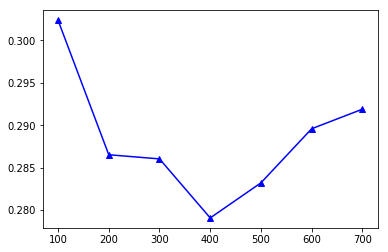

In [19]:
plot_log_loss_n_feature('A', 100, 800, 100)

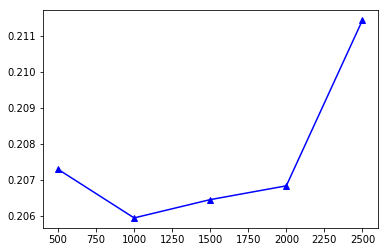

In [20]:
plot_log_loss_n_feature('B', 500, 3000, 500)

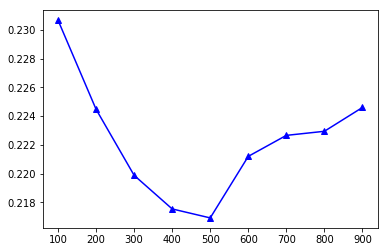

In [21]:
plot_log_loss_n_feature('C', 100, 1000, 100)

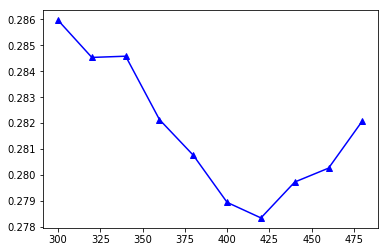

In [22]:
plot_log_loss_n_feature('A', 300, 500, 20)

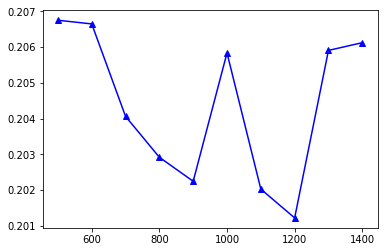

In [23]:
plot_log_loss_n_feature('B', 500, 1500, 100)

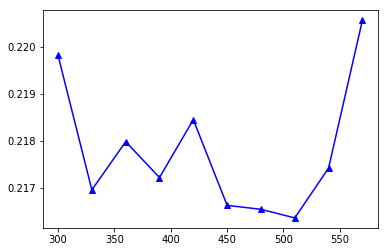

In [25]:
plot_log_loss_n_feature('C', 300, 600, 30)

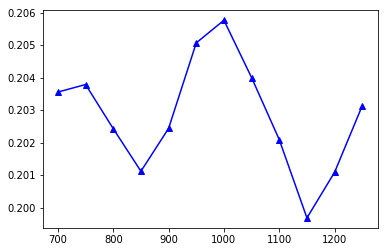

In [26]:
plot_log_loss_n_feature('B', 700, 1300, 50)

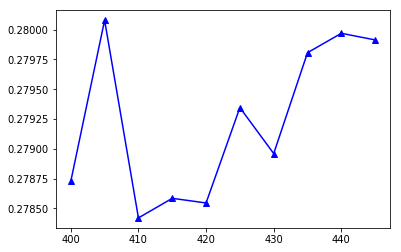

In [27]:
plot_log_loss_n_feature('A', 400, 450, 5)

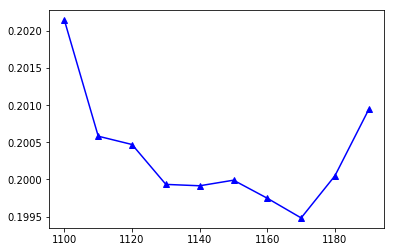

In [28]:
plot_log_loss_n_feature('B', 1100, 1200, 10)

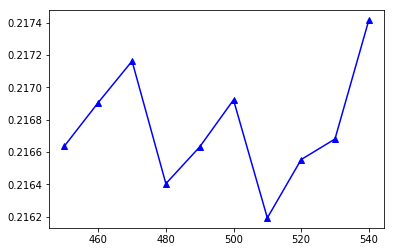

In [29]:
plot_log_loss_n_feature('C', 450, 550, 10)

In [30]:
bestAtop = 410

In [31]:
bestBtop = 1170

In [32]:
bestCtop = 510

# SVM Tunning

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid =  [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [100, 300, 1000]},
                {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# Create a based model
svc = SVC(probability=True)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv = 3, scoring = 'neg_log_loss')

In [36]:
# For A
top_importances_A = [x[1] for x in Arf_feat_impt][:bestAtop]
AXtrn_top,AXtst_top,Aytrn_top,Aytst_top = train_test_split(
    AX_all[AX_all.index.isin(A_train.index)][top_importances_A].as_matrix(),
    Ay,test_size=0.33, random_state=42)
grid_search.fit(AXtrn_top,Aytrn_top)
grid_search.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [37]:
# For B
top_importances_B = [x[1] for x in Brf_feat_impt][:bestBtop]
BXtrn_top,BXtst_top,Bytrn_top,Bytst_top = train_test_split(
    BX_all[BX_all.index.isin(B_train.index)][top_importances_B].as_matrix(),
    By,test_size=0.33, random_state=42)
grid_search.fit(BXtrn_top,Bytrn_top)
grid_search.best_params_

{'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}

In [38]:
# For C
top_importances_C = [x[1] for x in Crf_feat_impt][:bestCtop]
CXtrn_top,CXtst_top,Cytrn_top,Cytst_top = train_test_split(
    CX_all[CX_all.index.isin(C_train.index)][top_importances_C].as_matrix(),
    Cy,test_size=0.33, random_state=42)
grid_search.fit(CXtrn_top,Cytrn_top)
grid_search.best_params_

{'C': 100, 'kernel': 'linear'}

In [40]:
best_params_A = {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
best_params_B = {'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}
best_params_C = {'C': 100, 'kernel': 'linear'}

In [41]:
bestsvcA = SVC(probability=True)
bestsvcA.set_params(**best_params_A)
bestsvcB = SVC(probability=True)
bestsvcB.set_params(**best_params_B)
bestsvcC = SVC(probability=True)
bestsvcC.set_params(**best_params_C)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Top Features to Fit

In [42]:
AX_train = AX_all[AX_all.index.isin(A_train.index)][top_importances_A].as_matrix()
AX_test = AX_all[AX_all.index.isin(A_test.index)][top_importances_A].as_matrix()
bestsvcA.fit(AX_train,Ay)
Ay_pred = bestsvcA.predict_proba(AX_test)

In [46]:
BX_train = BX_all[BX_all.index.isin(B_train.index)][top_importances_B].as_matrix()
BX_test = BX_all[BX_all.index.isin(B_test.index)][top_importances_B].as_matrix()
bestsvcB.fit(BX_train,By)
By_pred = bestsvcB.predict_proba(BX_test)

In [47]:
CX_train = CX_all[CX_all.index.isin(C_train.index)][top_importances_C].as_matrix()
CX_test = CX_all[CX_all.index.isin(C_test.index)][top_importances_C].as_matrix()
bestsvcC.fit(CX_train,Cy)
Cy_pred = bestsvcC.predict_proba(CX_test)

In [63]:
A_submit = pd.DataFrame(Ay_pred[:,1],index=A_test.index,columns=['poor'])
B_submit = pd.DataFrame(By_pred[:,1],index=B_test.index,columns=['poor'])
C_submit = pd.DataFrame(Cy_pred[:,1],index=C_test.index,columns=['poor'])

In [67]:
A_submit['country']='A'
B_submit['country']='B'
C_submit['country']='C'

In [73]:
submit = pd.concat([A_submit,B_submit,C_submit])

In [77]:
submit[['country','poor']].to_csv('submit.csv',)